In [1]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy

# How to use gridspec
# https://matplotlib.org/3.1.1/tutorials/intermediate/gridspec.html

### Load data

In [131]:
sbi_post = np.load('SBI_10_10gen_large_sample.npy')
sbi_time = np.load('SBI_10_10gen_large_sample_times.npy')
sbi_post = sbi_post[:5,:8,:,:]
sbi_time = sbi_time[:5,:8]

In [123]:
#sbi_post = np.load('SBI_5_8gen_large_sample_nsf.npy')

In [60]:
#np.array([np.array(x[:][:]) for x in np.array(smc_post[:])]).shape
smc_post = np.load('smcabc_posterior_5gen.npy',allow_pickle=True)

#smc_post = np.load('smcabc_posterior_10gen.npy', allow_pickle=True)
Y = np.empty(shape=(5,8,1000,3))
for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
        Y[i,j,:,:] = smc_post[i][j][:1000][:]
smc_post = Y

smc_time = np.load('smcabc_posterior_5gen_time.npy')

In [100]:
bcnn_post = np.load('bnn_res_5_5round_8gen_theta_thresh.npy')
bcnn_time = np.load('bnn_res_5_5round_8gen_time_thresh.npy')

In [101]:
bcnn_post = bcnn_post[:,1:,:,:]


### Compute mean and std

In [91]:
bcnn_time = bcnn_time/3.0 # we compute 

(5, 8)

In [132]:
sbi_post_mean = sbi_post.mean(axis=2)
sbi_post_std = sbi_post.std(axis=2)

sbi_time_mean = sbi_time.mean(axis=0)
sbi_time_std = sbi_time.std(axis=0)

bcnn_post_mean = bcnn_post.mean(axis=2)
bcnn_post_std = bcnn_post.std(axis=2)

bcnn_time_mean = bcnn_time.mean(axis=0)
bcnn_time_std = bcnn_time.std(axis=0)

smc_post_mean = np.mean(smc_post, axis=2)
smc_post_std = np.std(smc_post, axis=2)

### Plotting mean and std of p(theta| y_obs) 

In [9]:
theta_true = np.log([[1.0,0.005, 1.0]])

In [10]:
theta_ = np.expand_dims(theta_true,axis=[0,1])

In [129]:
sbi_post_mse = ((theta_ - sbi_post)**2).mean(axis=(2,3))
bcnn_post_mse = ((theta_ - bcnn_post)**2).mean(axis=(2,3))
smc_post_mse = ((theta_ - smc_post)**2).mean(axis=(2,3))

In [12]:
import matplotlib
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True

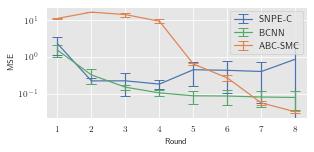

In [133]:
sns.set_theme()

#sns.relplot(kind="line",
#    x=np.arange(len(bcnn_post_mean[0])), y=bcnn_post_mean[0,:,0])


font_size = 8
sns.set_context("paper", rc={"font.size":font_size,"axes.titlesize":font_size,"axes.labelsize":font_size, "axis.legendsize":font_size })
sns.set_style("darkgrid", {"axes.facecolor": ".9"})



f = plt.figure(figsize=(4.25, 2), constrained_layout=True)

#f = plt.figure(figsize=(8, 5))
#f = plt.figure(figsize=(3.25, 2))
gs = f.add_gridspec(1, 1)

#Theta 1,2,3 mse(<post>)
ax = f.add_subplot(gs[0, 0])
ax.errorbar(x=np.arange(8)+1, y=sbi_post_mse.mean(axis=0)[:], 
            yerr=sbi_post_mse.std(axis=0)[:], 
            capsize=5, color='C0', label='SNPE-C')
ax.errorbar(x=np.arange(8)+1, y=bcnn_post_mse.mean(axis=0)[:], 
            yerr=bcnn_post_mse.std(axis=0)[:],
            capsize=5, color='C2', label='BCNN')
ax.errorbar(x=np.arange(8)+1, y=smc_post_mse.mean(axis=0)[:], 
            yerr=smc_post_mse.std(axis=0)[:],
            capsize=5, color='C1', label='ABC-SMC')
#ax.axhline(exact_samples.std(axis=0)[0], linestyle='--', color='C1')
ax.set_ylabel('MSE')
ax.set_xlabel('Round')
#ax.set_title(r'$(\theta_1,\theta_2,\theta_3$')

plt.legend(loc='upper right')
plt.yscale('log')

#plt.savefig('lv_mse.pdf',dpi=350, bbox_inches = 'tight', pad_inches = 0)

In [416]:
theta_true.shape

(1, 3)

In [114]:

def posterior_snaps(run_idx=0, save=True):  
    
    def multivar(grid, x, y, xlabel='', ylabel='', label='',color='C0'):
        ax = f.add_subplot(grid)
        sns.kdeplot(x=x, y=y, ax=ax, label=label,color=color)
        ax.set_ylim(np.log(0.002),np.log(2))
        ax.set_xlim(np.log(0.002),np.log(2))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        return ax

    def singlevar(grid, x, y, xlabel='', ylabel='', label='',color='C0'):
        ax = f.add_subplot(grid)
        ax.plot(x, y, marker='x', ms=5, label=label,color=color)
        ax.set_ylim(np.log(0.002),np.log(2))
        ax.set_xlim(np.log(0.002),np.log(2))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        return ax


    font_size = 8
    sns.set_context("paper", rc={"font.size":font_size,"axes.titlesize":font_size,"axes.labelsize":font_size, "axis.legendsize":font_size })
    sns.set_style("darkgrid", {"axes.facecolor": ".9"})

    f = plt.figure(figsize=(4.25, 4.25), constrained_layout=True)
    #f = plt.figure(figsize=(6, 6), constrained_layout=True)

    widths =  [1, 1, 1]# 1, 1, 1, 1, 1]
    heights = [1, 1, 1]#, 1, 1, 1, 1, 1, 1]
    gs = f.add_gridspec(3,3, width_ratios=widths, height_ratios=heights)
    #gs = f.add_gridspec(9,3)
    # k1 x k2

    ax = multivar(gs[0, 0],x=smc_post[run_idx, 1, :, 1], y=smc_post[run_idx, 1, :, 0],ylabel=r'$(\theta_2, \theta_1)$',color='C1')
    ax = multivar(gs[0, 1],x=smc_post[run_idx, 3, :, 1], y=smc_post[run_idx, 3, :, 0],color='C1')
    ax = multivar(gs[0, 2],x=smc_post[run_idx, 7, :, 1], y=smc_post[run_idx, 7, :, 0], label='ABC-SMC',color='C1')

    ax = multivar(gs[0, 0],x=bcnn_post[run_idx, 1, :, 1], y=bcnn_post[run_idx, 1, :, 0],ylabel=r'$(\theta_2, \theta_1)$',color='C2')
    ax = multivar(gs[0, 1],x=bcnn_post[run_idx, 3, :, 1], y=bcnn_post[run_idx, 3, :, 0],color='C2')
    ax = multivar(gs[0, 2],x=bcnn_post[run_idx, 7, :, 1], y=bcnn_post[run_idx, 7, :, 0],label='BCNN',color='C2')

    ax = multivar(gs[0, 0],x=sbi_post[run_idx, 1, :, 1], y=sbi_post[run_idx, 1, :, 0],ylabel=r'$(\theta_2, \theta_1)$',color='C0')
    ax = multivar(gs[0, 1],x=sbi_post[run_idx, 3, :, 1], y=sbi_post[run_idx, 3, :, 0],color='C0')
    ax = multivar(gs[0, 2],x=sbi_post[run_idx, 7, :, 1], y=sbi_post[run_idx, 7, :, 0], label='SNPE-C',color='C0')

    ax = singlevar(gs[0, 0],x=theta_true[0,1],y=theta_true[0,0],color='C3',ylabel=r'$(\theta_2, \theta_1)$')
    ax = singlevar(gs[0, 1],x=theta_true[0,1],y=theta_true[0,0],color='C3')
    ax = singlevar(gs[0, 2],x=theta_true[0,1],y=theta_true[0,0],color='C3',label='truth')





    ax.legend(loc='lower right')

    # k1 x k3

    ax = multivar(gs[1, 0],x=smc_post[run_idx, 1, :, 2], y=smc_post[run_idx, 1, :, 0],ylabel=r'$(\theta_3, \theta_1)$',color='C1')
    ax = multivar(gs[1, 1],x=smc_post[run_idx, 3, :, 2], y=smc_post[run_idx, 3, :, 0],color='C1')
    ax = multivar(gs[1, 2],x=smc_post[run_idx, 7, :, 2], y=smc_post[run_idx, 7, :, 0], label='ABC-SMC',color='C1')

    ax = multivar(gs[1, 0],x=bcnn_post[run_idx, 1, :, 2], y=bcnn_post[run_idx, 1, :, 0],ylabel=r'$(\theta_3, \theta_1)$',color='C2')
    ax = multivar(gs[1, 1],x=bcnn_post[run_idx, 3, :, 2], y=bcnn_post[run_idx, 3, :, 0],color='C2')
    ax = multivar(gs[1, 2],x=bcnn_post[run_idx, 7, :, 2], y=bcnn_post[run_idx, 7, :, 0],color='C2')

    ax = multivar(gs[1, 0],x=sbi_post[run_idx, 1, :, 2], y=sbi_post[run_idx, 1, :, 0],ylabel=r'$(\theta_3, \theta_1)$', color='C0')
    ax = multivar(gs[1, 1],x=sbi_post[run_idx, 3, :, 2], y=sbi_post[run_idx, 3, :, 0], color='C0')
    ax = multivar(gs[1, 2],x=sbi_post[run_idx, 7, :, 2], y=sbi_post[run_idx, 7, :, 0], color='C0')

    ax = singlevar(gs[1, 0],x=theta_true[0,2],y=theta_true[0,0],color='C3',ylabel=r'$(\theta_3, \theta_1)$')
    ax = singlevar(gs[1, 1],x=theta_true[0,2],y=theta_true[0,0],color='C3')
    ax = singlevar(gs[1, 2],x=theta_true[0,2],y=theta_true[0,0],color='C3',label='truth')


    # k2 x k3


    ax = multivar(gs[2, 0],x=smc_post[run_idx, 1, :, 2], y=smc_post[run_idx, 1, :, 1], xlabel='Round 2',ylabel=r'$(\theta_3, \theta_2)$',color='C1')
    ax = multivar(gs[2, 1],x=smc_post[run_idx, 3, :, 2], y=smc_post[run_idx, 3, :, 1], xlabel='Round 2',color='C1')
    ax = multivar(gs[2, 2],x=smc_post[run_idx, 7, :, 2], y=smc_post[run_idx, 7, :, 1], xlabel='Round 2', label='ABC-SMC',color='C1')


    ax = multivar(gs[2, 0],x=bcnn_post[run_idx, 1, :, 2], y=bcnn_post[run_idx, 1, :, 1],xlabel='Round 2',ylabel=r'$(\theta_3, \theta_2)$',color='C2')
    ax = multivar(gs[2, 1],x=bcnn_post[run_idx, 3, :, 2], y=bcnn_post[run_idx, 3, :, 1],xlabel='Round 4',color='C2')
    ax = multivar(gs[2, 2],x=bcnn_post[run_idx, 7, :, 2], y=bcnn_post[run_idx, 7, :, 1],xlabel='Round 8',color='C2')


    ax = multivar(gs[2, 0],x=sbi_post[run_idx, 1, :, 2], y=sbi_post[run_idx, 1, :, 1], xlabel='Round 2',ylabel=r'$(\theta_3, \theta_2)$', color='C0')
    ax = multivar(gs[2, 1],x=sbi_post[run_idx, 3, :, 2], y=sbi_post[run_idx, 3, :, 1], xlabel='Round 4', color='C0')
    ax = multivar(gs[2, 2],x=sbi_post[run_idx, 7, :, 2], y=sbi_post[run_idx, 7, :, 1], xlabel='Round 8', color='C0')


    ax = singlevar(gs[2, 0],x=theta_true[0,2],y=theta_true[0,1],color='C3',xlabel='Round 2',ylabel=r'$(\theta_3, \theta_2)$')
    ax = singlevar(gs[2, 1],x=theta_true[0,2],y=theta_true[0,1],color='C3',xlabel='Round 4')
    ax = singlevar(gs[2, 2],x=theta_true[0,2],y=theta_true[0,1],color='C3',label='truth',xlabel='Round 8')

    if save:
        plt.savefig(f'lv_dens_{run_idx}.pdf',dpi=350, bbox_inches = 'tight', pad_inches = 0)



In [ ]:
for i in range(bcnn_post.shape[0]):
    posterior_snaps(run_idx=i,save=True) 

/home/psingh/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/home/psingh/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/home/psingh/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes 

/home/psingh/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/home/psingh/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


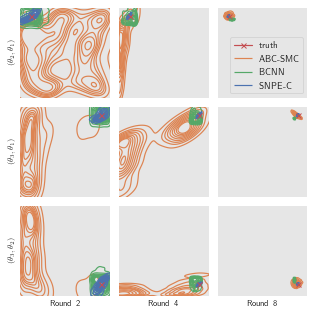

In [116]:
posterior_snaps(run_idx=1,save=False) 

In [84]:
bcnn_post.shape


(5, 6, 1000, 3)

### Plotting execution time

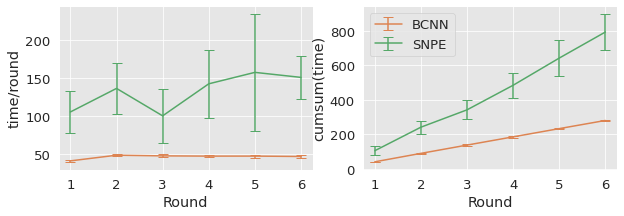

In [41]:
sns.set_theme()
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1.5})
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

f = plt.figure(figsize=(10, 3))
gs = f.add_gridspec(1, 2)

#Theta 1 E(<post>)
ax = f.add_subplot(gs[0, 0])

ax.errorbar(x=np.arange(6)+1, y=bcnn_time.mean(axis=0), 
            yerr=bcnn_time.std(axis=0), 
            capsize=5, color='C1', label='BCNN')
ax.errorbar(x=np.arange(6)+1, y=sbi_time.mean(axis=0), 
            yerr=sbi_time.std(axis=0), 
            capsize=5, color='C2', label='SNPE')
ax.set_xlabel("Round")
ax.set_ylabel("time/round")

ax = f.add_subplot(gs[0, 1])

bcnn_cumsum = np.cumsum(bcnn_time, axis=1)
sbi_cumsum = np.cumsum(sbi_time, axis=1)
ax.errorbar(x=np.arange(6)+1, y=bcnn_cumsum.mean(axis=0), 
            yerr=bcnn_cumsum.std(axis=0), 
            capsize=5, color='C1', label='BCNN')
ax.errorbar(x=np.arange(6)+1, y=sbi_cumsum.mean(axis=0), 
            yerr=sbi_cumsum.std(axis=0), 
            capsize=5, color='C2', label='SNPE')

ax.set_xlabel("Round")
ax.set_ylabel("cumsum(time)")

plt.legend()
plt.show()

# impact of # of bins

In [26]:
bcnn3 = np.load('bnn_res_3_5round_8gen_theta_thresh.npy')
bcnn4 = np.load('bnn_res_4_5round_8gen_theta_thresh.npy')
bcnn5 = np.load('bnn_res_5_5round_8gen_theta_thresh.npy')

In [27]:
bcnn3_mse = ((theta_ - bcnn3)**2).mean(axis=(2,3))
bcnn4_mse = ((theta_ - bcnn4)**2).mean(axis=(2,3))
bcnn5_mse = ((theta_ - bcnn5)**2).mean(axis=(2,3))

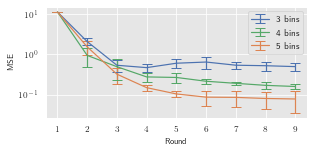

In [37]:
sns.set_theme()

#sns.relplot(kind="line",
#    x=np.arange(len(bcnn_post_mean[0])), y=bcnn_post_mean[0,:,0])


font_size = 8
sns.set_context("paper", rc={"font.size":font_size,"axes.titlesize":font_size,"axes.labelsize":font_size, "axis.legendsize":font_size })
sns.set_style("darkgrid", {"axes.facecolor": ".9"})



f = plt.figure(figsize=(4.25, 2), constrained_layout=True)

#f = plt.figure(figsize=(8, 5))
#f = plt.figure(figsize=(3.25, 2))
gs = f.add_gridspec(1, 1)

#Theta 1,2,3 mse(<post>)
ax = f.add_subplot(gs[0, 0])
ax.errorbar(x=np.arange(9)+1, y=bcnn3_mse.mean(axis=0)[:], 
            yerr=bcnn3_mse.std(axis=0)[:], 
            capsize=5, color='C0', label='3 bins')
ax.errorbar(x=np.arange(9)+1, y=bcnn4_mse.mean(axis=0)[:], 
            yerr=bcnn4_mse.std(axis=0)[:],
            capsize=5, color='C2', label='4 bins')
ax.errorbar(x=np.arange(9)+1, y=bcnn5_mse.mean(axis=0)[:], 
            yerr=bcnn5_mse.std(axis=0)[:],
            capsize=5, color='C1', label='5 bins')
#ax.axhline(exact_samples.std(axis=0)[0], linestyle='--', color='C1')
ax.set_ylabel('MSE')
ax.set_xlabel('Round')
#ax.set_title(r'$(\theta_1,\theta_2,\theta_3$')
plt.yscale('log')
plt.legend(loc='upper right')

plt.savefig('lv_bins.pdf',dpi=350, bbox_inches = 'tight', pad_inches = 0)

# threshold or not

In [38]:
bcnn5_no = np.load('bnn_res_5_5round_8gen_theta.npy')
bcnn5_no_mse = ((theta_ - bcnn5_no)**2).mean(axis=(2,3))

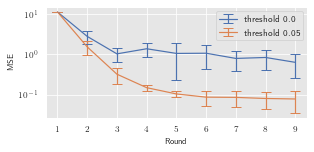

In [43]:
sns.set_theme()

#sns.relplot(kind="line",
#    x=np.arange(len(bcnn_post_mean[0])), y=bcnn_post_mean[0,:,0])


font_size = 8
sns.set_context("paper", rc={"font.size":font_size,"axes.titlesize":font_size,"axes.labelsize":font_size, "axis.legendsize":font_size })
sns.set_style("darkgrid", {"axes.facecolor": ".9"})



f = plt.figure(figsize=(4.25, 2), constrained_layout=True)

#f = plt.figure(figsize=(8, 5))
#f = plt.figure(figsize=(3.25, 2))
gs = f.add_gridspec(1, 1)

#Theta 1,2,3 mse(<post>)
ax = f.add_subplot(gs[0, 0])
ax.errorbar(x=np.arange(9)+1, y=bcnn5_no_mse.mean(axis=0)[:], 
            yerr=bcnn5_no_mse.std(axis=0)[:],
            capsize=5, color='C0', label='threshold 0.0')
ax.errorbar(x=np.arange(9)+1, y=bcnn5_mse.mean(axis=0)[:], 
            yerr=bcnn5_mse.std(axis=0)[:],
            capsize=5, color='C1', label='threshold 0.05')
#ax.axhline(exact_samples.std(axis=0)[0], linestyle='--', color='C1')
ax.set_ylabel('MSE')
ax.set_xlabel('Round')
#ax.set_title(r'$(\theta_1,\theta_2,\theta_3$')
plt.yscale('log')
plt.legend(loc='upper right')

plt.savefig('lv_thresh.pdf',dpi=350, bbox_inches = 'tight', pad_inches = 0)

# elapsed time

In [71]:
sbi_time.shape

(5, 8, 1000, 3)

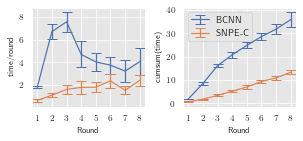

In [135]:
sns.set_theme()
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1.5})
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

mpl.rcParams['ps.useafm'] = True
mpl.rcParams['pdf.use14corefonts'] = True
mpl.rcParams['text.usetex'] = True

sns.set_theme()
font_size = 8
sns.set_context("paper", rc={"font.size":font_size,"axes.titlesize":font_size,"axes.labelsize":font_size, "axis.legendsize":font_size })
sns.set_style("darkgrid", {"axes.facecolor": ".9"})


f = plt.figure(figsize=(4.25, 2))
gs = f.add_gridspec(1, 2)

#Theta 1 E(<post>)
ax = f.add_subplot(gs[0, 0])

ax.errorbar(x=np.arange(8)+1, y=bcnn_time.mean(axis=0)/60, 
            yerr=bcnn_time.std(axis=0)/60, 
            capsize=5, color='C0', label='BCNN')
ax.errorbar(x=np.arange(8)+1, y=sbi_time.mean(axis=0)/60, 
            yerr=sbi_time.std(axis=0)/60, 
            capsize=5, color='C1', label='SNPE')
ax.set_xlabel("Round")
ax.set_ylabel("time/round")
#ax.set_yticks([50, 100,150,200, 250])
ax.set_xticks(np.arange(8)+1)

ax = f.add_subplot(gs[0, 1])

bcnn_cumsum = np.cumsum(bcnn_time, axis=1)
sbi_cumsum = np.cumsum(sbi_time, axis=1)
ax.errorbar(x=np.arange(8)+1, y=bcnn_cumsum.mean(axis=0)/60, 
            yerr=bcnn_cumsum.std(axis=0)/60, 
            capsize=5, color='C0', label='BCNN')
ax.errorbar(x=np.arange(8)+1, y=sbi_cumsum.mean(axis=0)/60, 
            yerr=sbi_cumsum.std(axis=0)/60, 
            capsize=5, color='C1', label='SNPE-C')

ax.set_xlabel("Round")
ax.set_ylabel("cumsum(time)")
ax.set_xticks(np.arange(8)+1)


plt.legend()
plt.tight_layout()

plt.savefig('lv_time.pdf',dpi=350, bbox_inches = 'tight', pad_inches = 0)